# if you run the convert, you have to restart the kernel!
!jupyter nbconvert Playground_Lukas.ipynb --to slides --post serve --SlidesExporter.reveal_theme=serif --SlidesExporter.reveal_scroll=False --SlidesExporter.reveal_transition=none

##prerequisites needs to be installed for interactive jupyter presentation.
!pip install RISE jupyter-contrib-nbextensions

!jupyter contrib nbextension install --user
!jupyter nbextension enable splitcell/splitcell

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': False,
})

# Obtain Data and Install

#This will install the package in the actual jupyter notebook Kernel. [with_Jupyter] is obsolete if you start it out of jupyter, but for demo purpose left inside. "." describes the path to the package, in this case its the same folder.
import sys
!{sys.executable} --version
!{sys.executable} -m pip install -e "."[with_jupyter] 


In [1]:
#### Enter your twitter Creds here:
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN =  "-"
ACCESS_TOKEN_SECRET = ""

### This will download the twitter data of major parties three weeks before European Parliament Election.

## Load data from csv into the analyzer:

In [13]:
import yatclient as yat
analyzer_load = yat.TweetAnalyzer()
#analyzer_load.read_from_csv("tweets2019-07-05_own.csv")
analyzer_load.read_from_csv("tweets2019-07-05_h12.43.csv")
analyzer_load.df.sort_values(by='likes', ascending=False).head(3)
#analyzer_load.df.loc[analyzer_load.df["author"] == "SPDEuropa"].sort_values(by='likes', ascending=False).head(3)
df = analyzer_load.get_dataframe()
print("Timeframe from:\n",df.groupby(by=["author"]).date.min(),"\n\nto date:\n",df.groupby(by=["author"]).date.max(),"\n")
df.head(2)

Timeframe from:
 author
AfD           2019-05-02 09:16:10
CDU           2019-05-02 06:27:05
CSU           2019-05-02 08:21:33
DiePARTEI     2019-05-02 08:15:53
Die_Gruenen   2019-05-02 10:02:14
dieLinke      2019-05-02 06:03:56
fdp           2019-05-02 04:29:52
fwlandtag     2019-05-08 16:21:48
spdde         2019-05-16 18:33:23
Name: date, dtype: datetime64[ns] 

to date:
 author
AfD           2019-05-22 15:09:38
CDU           2019-05-22 18:04:30
CSU           2019-05-22 19:10:11
DiePARTEI     2019-05-22 22:05:21
Die_Gruenen   2019-05-22 16:26:08
dieLinke      2019-05-22 20:15:11
fdp           2019-05-22 17:01:11
fwlandtag     2019-05-20 07:26:16
spdde         2019-05-22 22:22:18
Name: date, dtype: datetime64[ns] 



,tweets,author,date,likes,retweets,hashtags,linked_accounts,urls,id,tweet_type
0,"@wiedernichtgan1 @katarinabarley @zdf Hi, wied...",spdde,2019-05-22 22:22:18,0,0,,"wiedernichtgan1, katarinabarley, ZDF",https://t.co/EU0RIHkISH,1131324433459810305,tweet
1,@paulwal97169800 @katarinabarley @zdf @gazprom...,spdde,2019-05-22 22:19:10,0,0,,"PaulWal97169800, katarinabarley, ZDF, GazpromDE",https://t.co/PbmUhKi60D,1131323643613634561,tweet


In [3]:
#Filter only tweets and put len of tweets in df.

analyzer_load.tweet_filter_tweet_type(obtain = "tweets", reset_drop_index = True, inplace = True)
analyzer_load.df.insert(1, "len", analyzer_load.df.tweets.str.len())

spdde


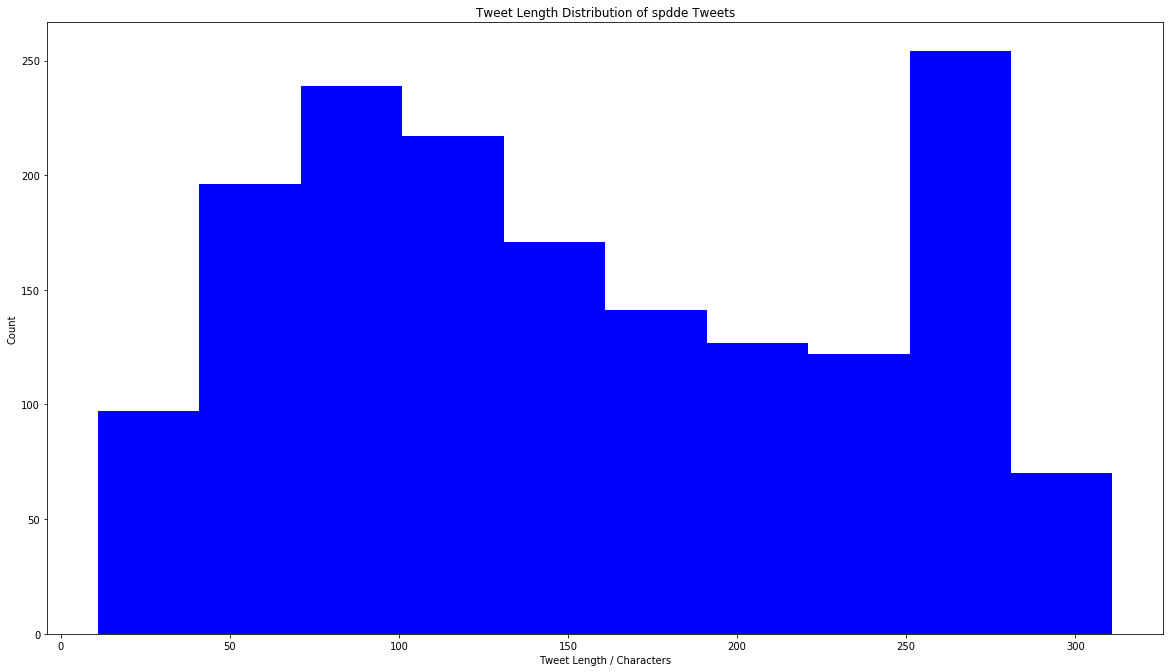

fdp


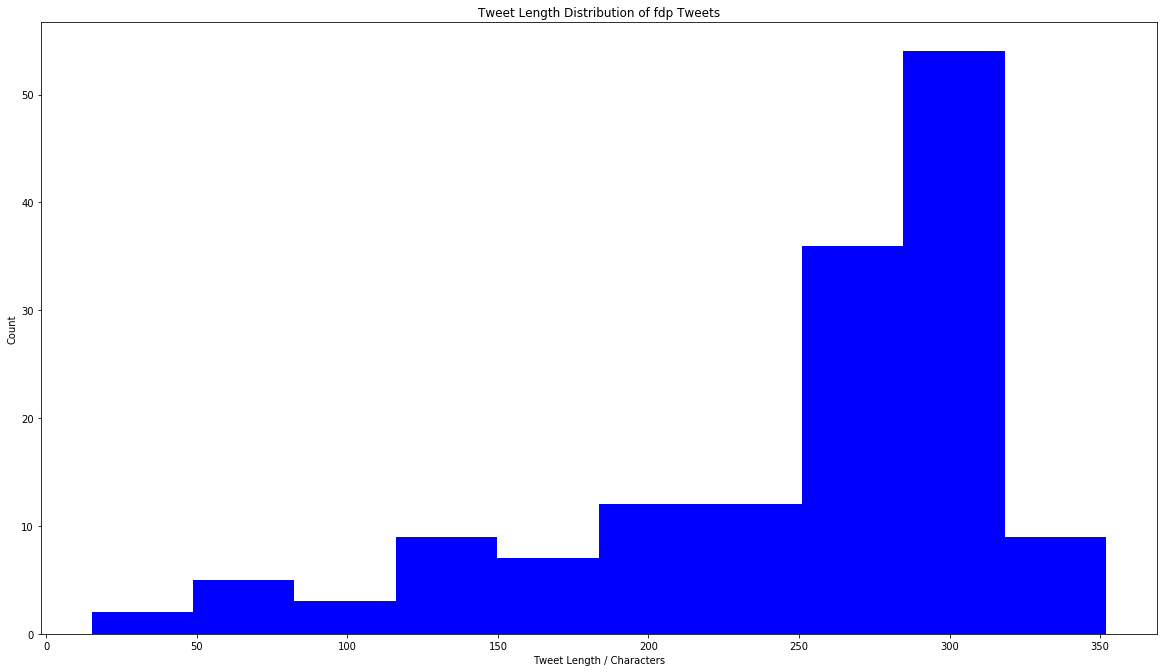

Die_Gruenen


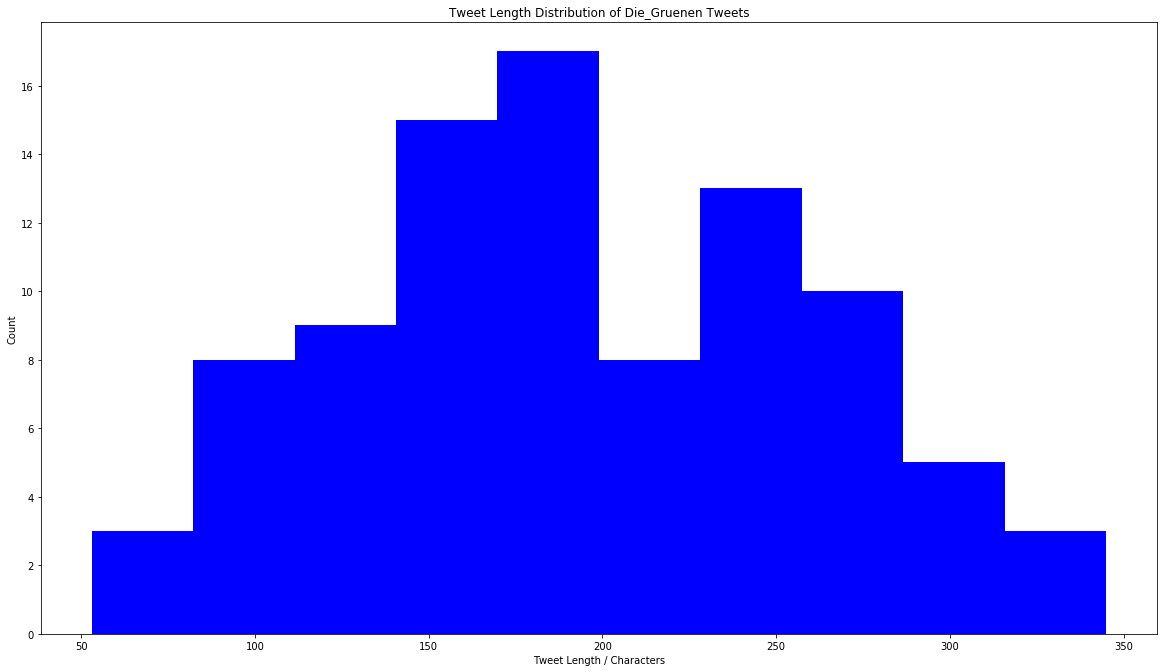

AfD


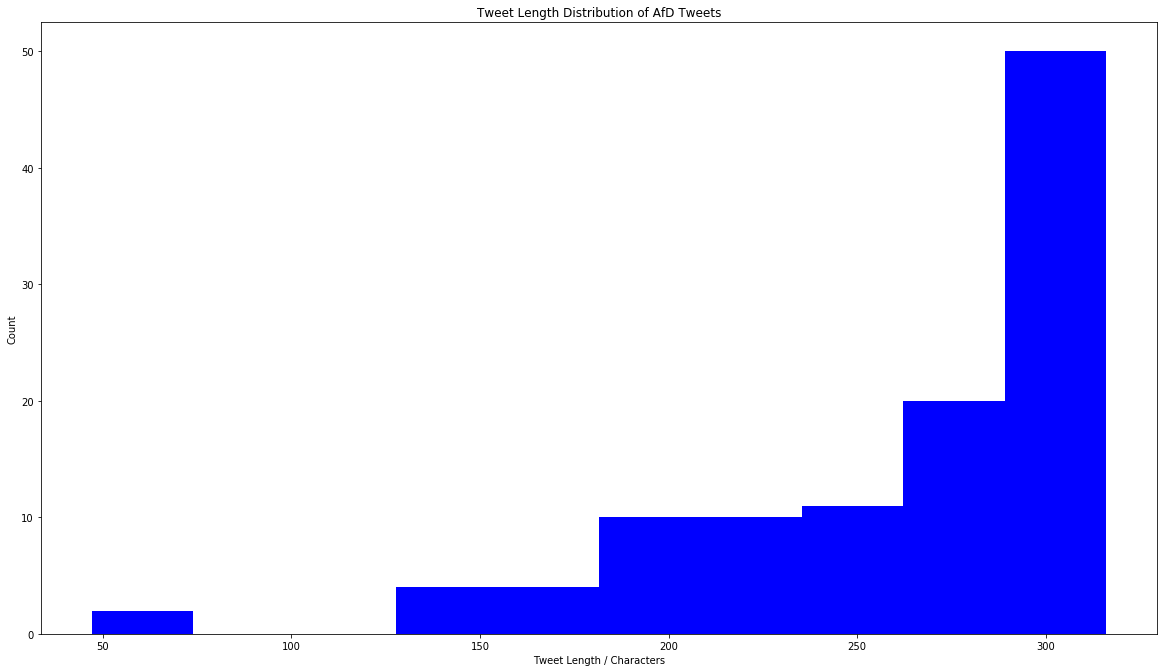

dieLinke


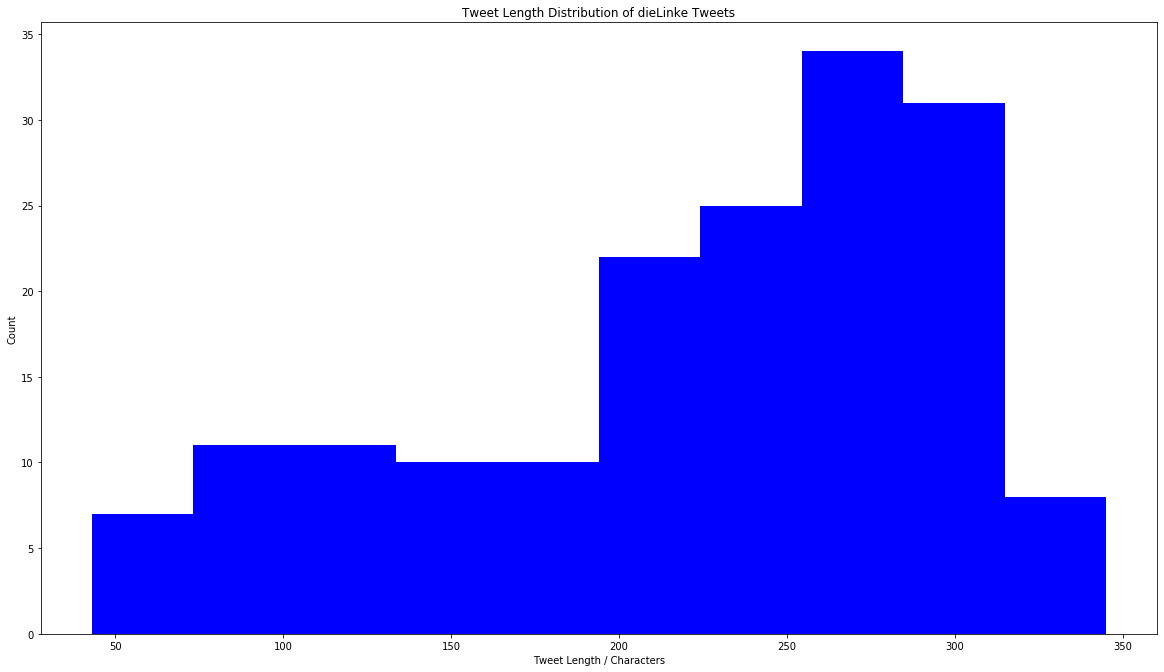

fwlandtag


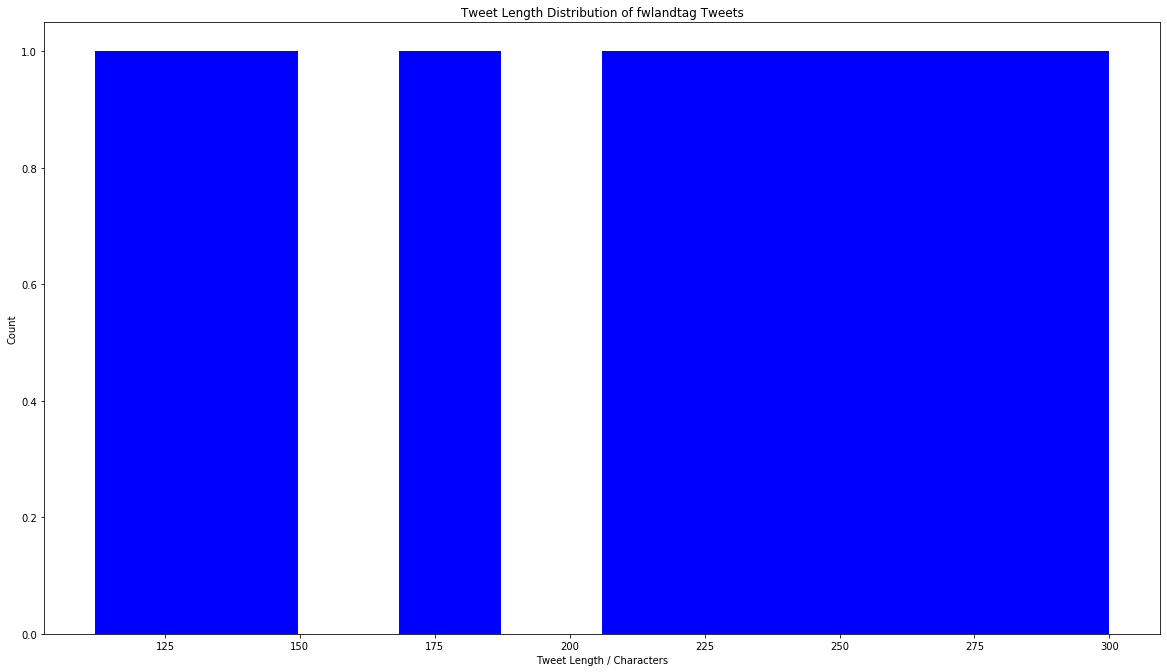

DiePARTEI


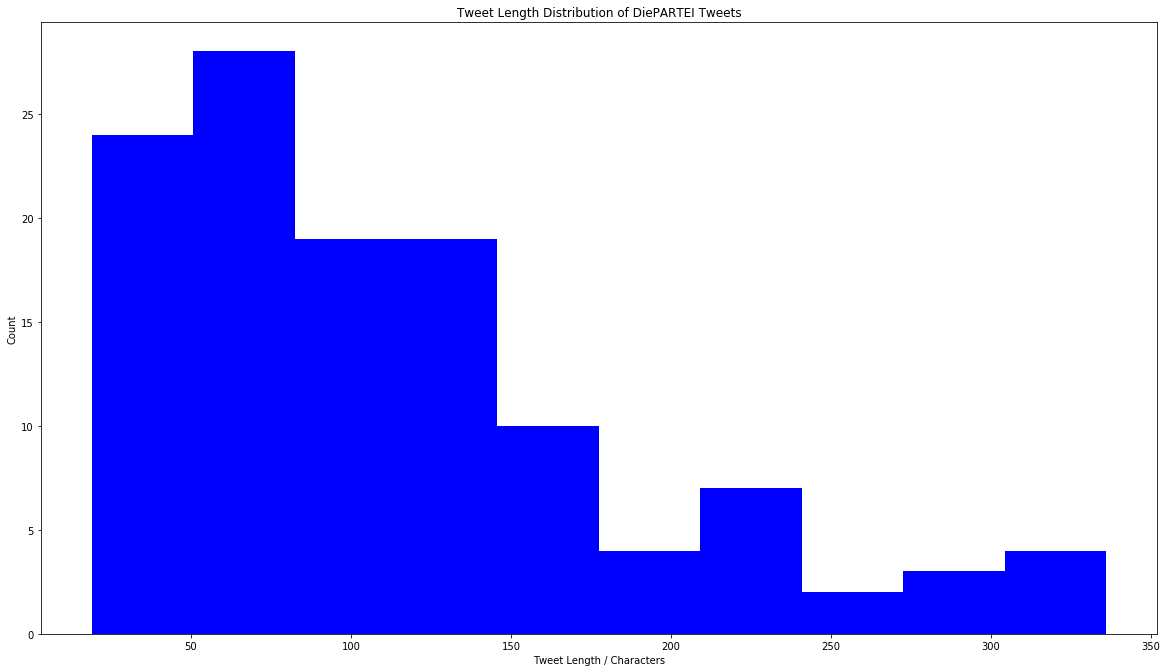

CDU


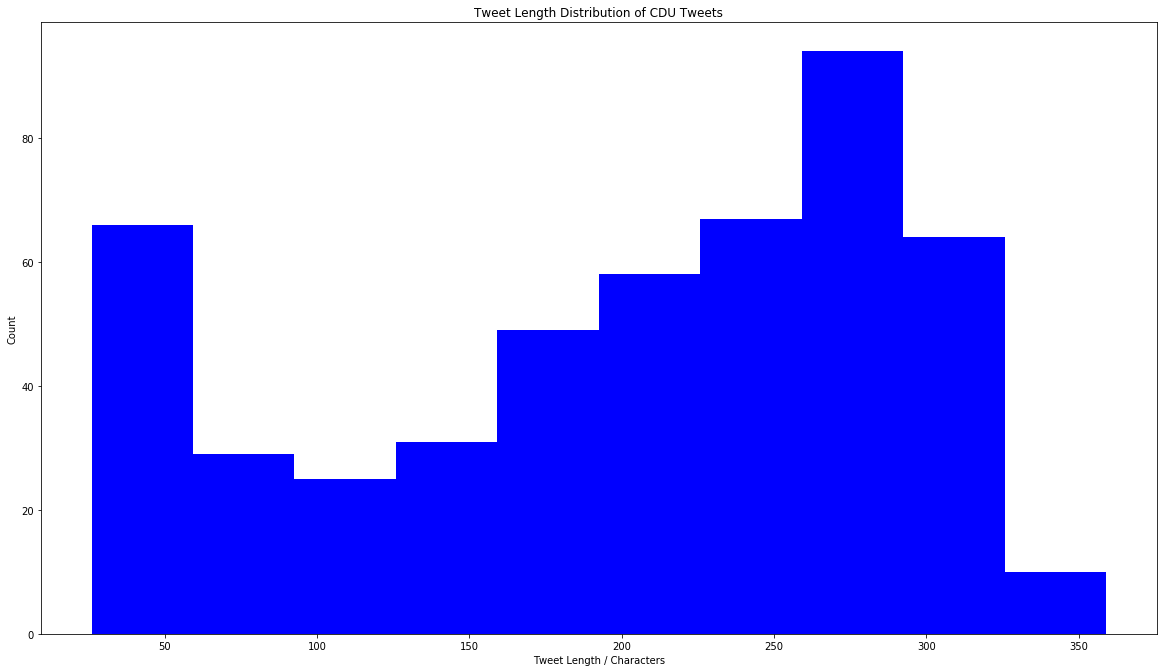

CSU


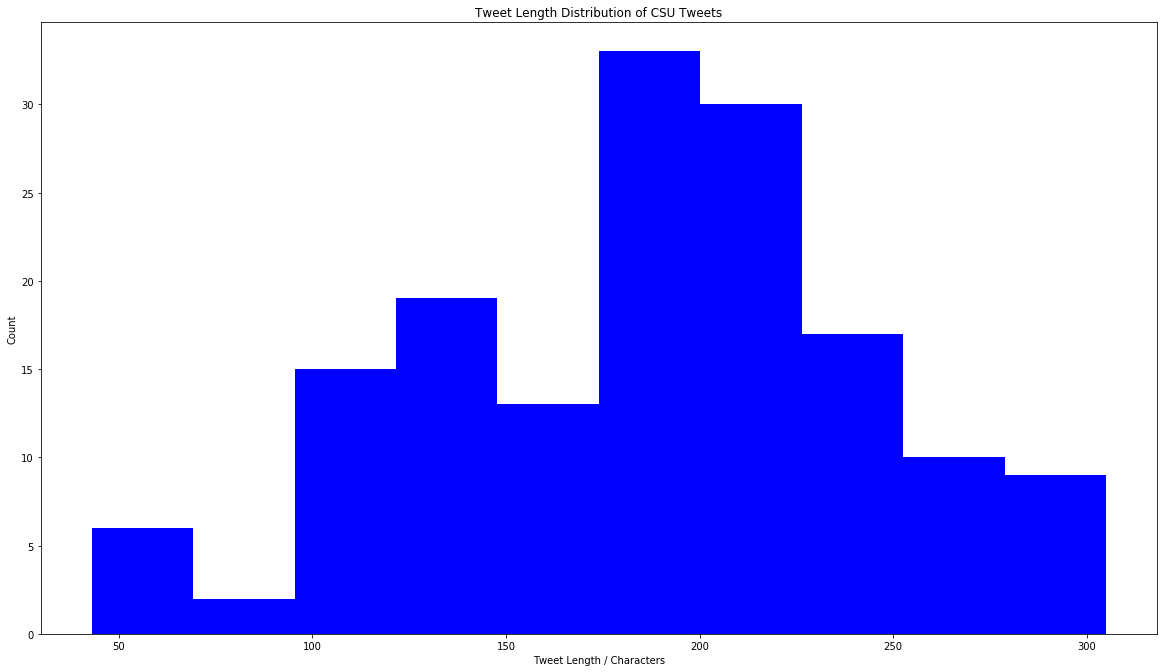

In [4]:
import matplotlib.pyplot as plt

for i in analyzer_load.df.author.unique():
    print(i)
    plt.figure(figsize=(20,11.25))
    analyzer_load.tweet_filter_account(accountname = [i])
    plt.hist(analyzer_load.tweet_filter_account(accountname = [i]).df["len"], facecolor = "blue")
    plt.xlabel('Tweet Length / Characters')
    plt.ylabel('Count')
    plt.title("Tweet Length Distribution of {} Tweets".format(i))
    plt.show()

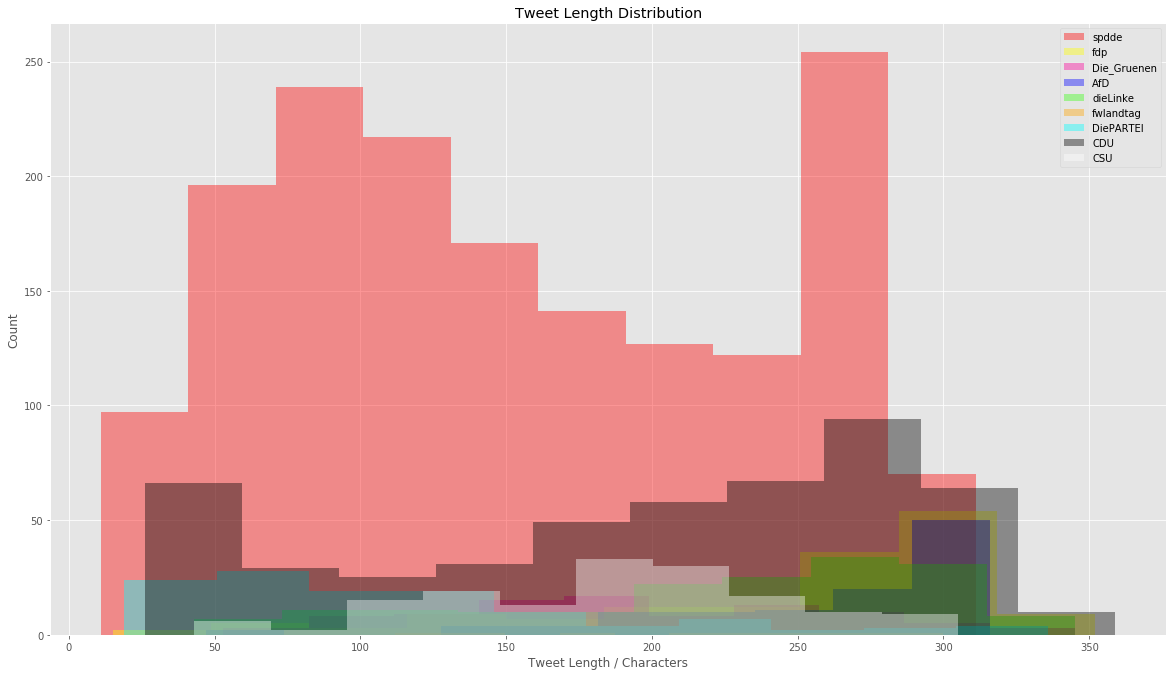

In [5]:
plt.figure(figsize=(20,11.25))
for i in analyzer_load.df.author.unique():
    #print(i)
    plt.style.use("ggplot")
    if i == "spdde": facecolor = "red"
    elif  i == "fdp": facecolor = "yellow"
    elif  i == "Die_Gruenen": facecolor = "#fe019a" #"#FF69B4" #"#0b6623"
    elif  i == "AfD": facecolor = "blue"
    elif  i == "dieLinke": facecolor = "#39ff14"
    elif  i == "fwlandtag": facecolor = "orange"
    elif  i == "DiePARTEI": facecolor = "#00ffff" ##FF69B4
    elif  i == "CDU": facecolor = "black"
    elif  i == "CSU": facecolor = "white"
    plt.hist(analyzer_load.tweet_filter_account(accountname = [i]).df["len"], alpha=0.4, label=i, facecolor = facecolor)
    plt.xlabel('Tweet Length / Characters')
    plt.ylabel('Count')
    plt.title("Tweet Length Distribution")
    plt.legend()
plt.show()

In [6]:
analyzer_loa = analyzer_load.tweet_filter_account(accountname = ["fdp","Die_Gruenen", "AfD", "dieLinke", "fwlandtag", "DiePARTEI", "CDU", "CSU"])

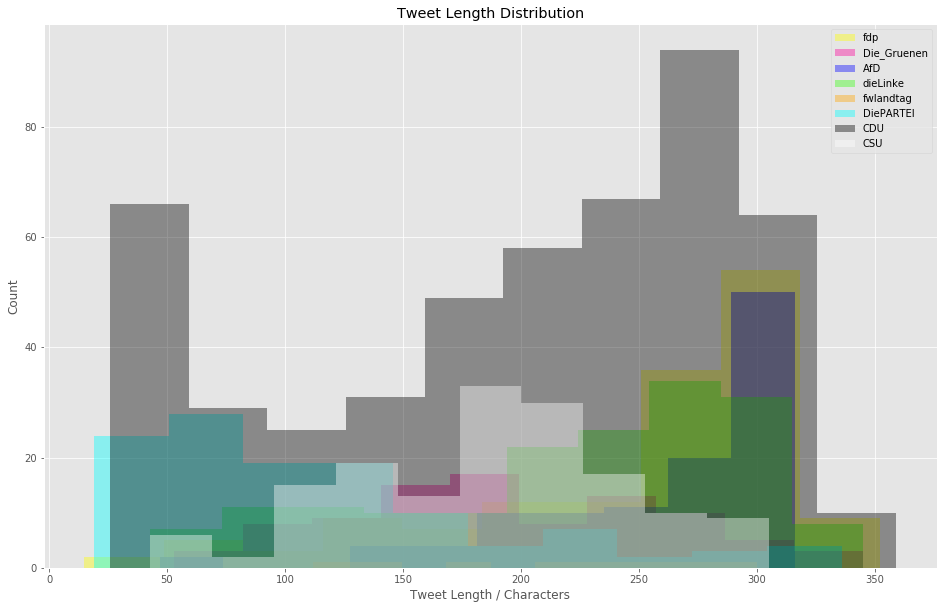

In [7]:
plt.figure(figsize=(16,10))
for i in analyzer_loa.df.author.unique():
    #print(i)
    plt.style.use("ggplot")
    if i == "spdde": facecolor = "red"
    elif  i == "fdp": facecolor = "yellow"
    elif  i == "Die_Gruenen": facecolor = "#fe019a" #"#FF69B4" #"#0b6623"
    elif  i == "AfD": facecolor = "blue"
    elif  i == "dieLinke": facecolor = "#39ff14"
    elif  i == "fwlandtag": facecolor = "orange"
    elif  i == "DiePARTEI": facecolor = "#00ffff" ##FF69B4
    elif  i == "CDU": facecolor = "black"
    elif  i == "CSU": facecolor = "white"
    plt.hist(analyzer_load.tweet_filter_account(accountname = [i]).df["len"], alpha=0.4, label=i, facecolor = facecolor)
    plt.xlabel('Tweet Length / Characters')
    plt.ylabel('Count')
    plt.title("Tweet Length Distribution")
    plt.legend()
plt.show()

### Putting the most liked tweet in the cleaner:

In [8]:
analyzer_load.df.tweets.iloc[51]

'So. Und was machen wir heute Nacht schönes? #schönesteuern https://t.co/iF5u0ZbDXP'

In [9]:
analyzer_load.tweet_manipulation(    
    all_tweets=False, tweetnumber=659,
    delete_numbers=True,
    delete_hyperlinks=True,
    delete_hashtags=True,
    only_small_letters=True,
    delete_diamonds_from_hashtags=False,
    delete_accountlinks=True,
    delete_at_from_accountlinks=False)

In [10]:
analyzer_load.df.tweets.iloc[659]

'@br79633720 Auch für uns ist der Mindestlohn zu gering, aber dass wir ihn gegen die Widerstände des CDU durchgerungen haben ist schon viel Wert. Außerdem soll der Mindestlohn kontinuierlich steigen.'

## Slicing frame for isolated analysis

In [11]:
analyzer_load.df.author.unique()

array(['spdde', 'fdp', 'Die_Gruenen', 'AfD', 'dieLinke', 'fwlandtag',
       'DiePARTEI', 'CDU', 'CSU'], dtype=object)

In [14]:
dfr= analyzer_load.get_dataframe()
df_SPDEuropa = dfr.loc[dfr["author"] == "spdde"].copy() #ATTENTION! to lazy to rename SPDEuropa
df_fdp = dfr.loc[dfr["author"] == "fdp"].copy()
df_Die_Gruenen = dfr.loc[dfr["author"] == "Die_Gruenen"].copy()
df_AfD = dfr.loc[dfr["author"] == "AfD"].copy()
df_dieLinke = dfr.loc[dfr["author"] == "dieLinke"].copy()
df_fwlandtag = dfr.loc[dfr["author"] == "fwlandtag"].copy()
df_DiePARTEI = dfr.loc[dfr["author"] == "DiePARTEI"].copy()
df_CDU = dfr.loc[dfr["author"] == "CDU"].copy()
df_CSU = dfr.loc[dfr["author"] == "CSU"].copy()

analyzer_SPDEuropa = yat.TweetAnalyzer(df = df_SPDEuropa)
analyzer_fdp = yat.TweetAnalyzer(df = df_fdp)
analyzer_Die_Gruenen = yat.TweetAnalyzer(df = df_Die_Gruenen)
analyzer_AfD = yat.TweetAnalyzer(df = df_AfD)
analyzer_dieLinke = yat.TweetAnalyzer(df = df_dieLinke)
analyzer_fwlandtag = yat.TweetAnalyzer(df = df_fwlandtag)
analyzer_DiePARTEI = yat.TweetAnalyzer(df = df_DiePARTEI)
analyzer_CDU = yat.TweetAnalyzer(df = df_CDU)
analyzer_CSU = yat.TweetAnalyzer(df = df_CSU)

## Summed up bag of words representation, eg. most used words.

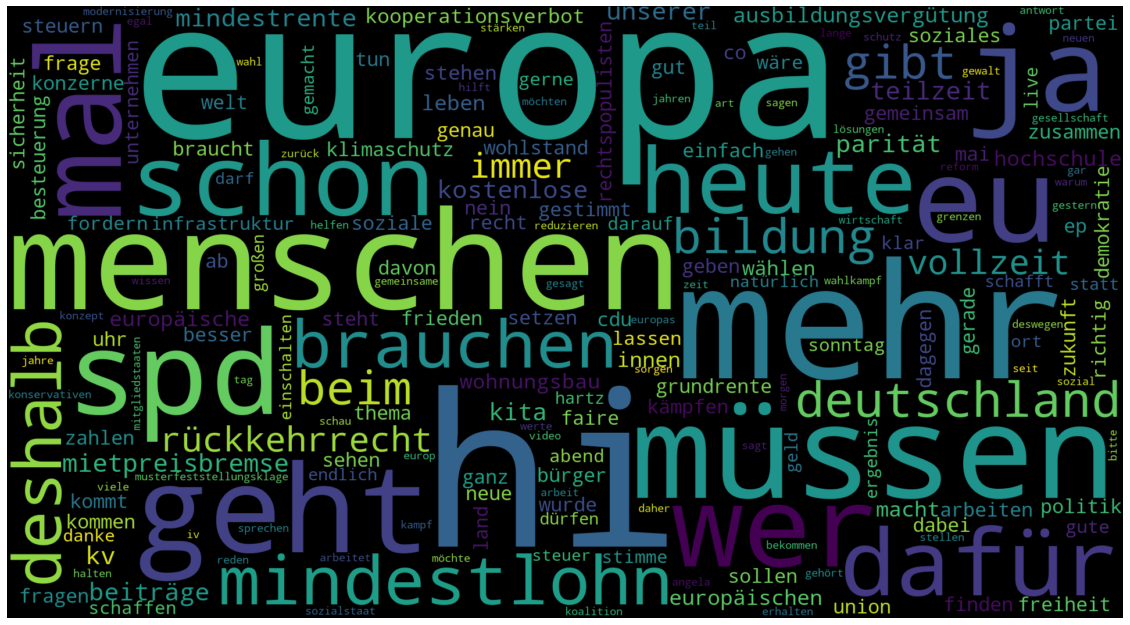

In [13]:
analyzer_load.wordcloud(color='black')

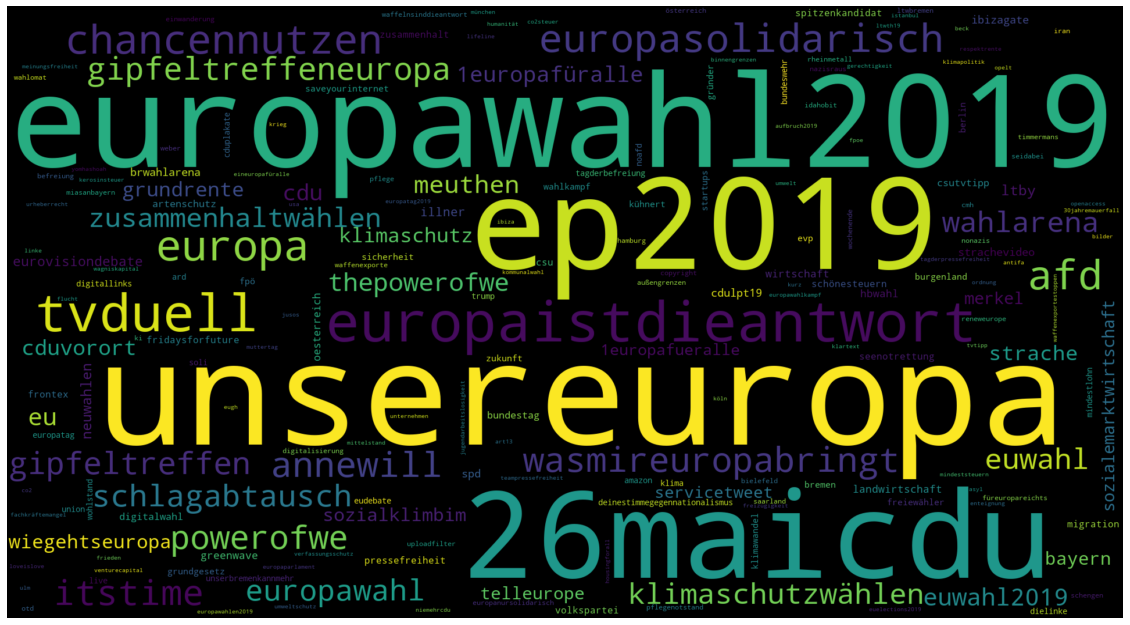

In [14]:
analyzer_load.wordcloud(type='hashtags' ,color='black')

In [15]:
analyzer_load.df.tweets.loc[2192]

'Unsere Top-Kandidatin (Listenplatz 3): Lisa Bombe\r\n„Zwei Themen liegen mir besonders am Herzen: Tierschutz und Digitales. Deshalb setze ich mich für eine Cat-Content-Quote im Netz ein. Durch mein Engagement wird garantiert, dass kein Katzenfoto im Uploadfilter hängen bleibt." https://t.co/QC3CPYcQqf'

In [16]:
analyzer_load.df.retweets.sort_values(ascending=False)

2213    752
1967    441
1878    390
2258    369
1963    354
1868    346
1961    333
1793    292
1969    287
1972    272
2192    263
1904    253
1899    249
1832    247
2216    244
1785    238
1936    235
1978    235
1874    233
1950    231
1887    227
1900    226
1974    223
2211    220
2218    216
1915    215
1928    209
1943    208
1858    207
1953    206
       ... 
1101      0
1102      0
1103      0
1104      0
1105      0
1084      0
1082      0
1059      0
1069      0
1060      0
1061      0
1062      0
1063      0
1064      0
1065      0
1066      0
1067      0
1068      0
1070      0
1081      0
1071      0
1073      0
1074      0
1075      0
1076      0
1077      0
1078      0
1079      0
1080      0
0         0
Name: retweets, Length: 2929, dtype: int64

In [17]:
#Number2 in retweets
analyzer_load.df.tweets.loc[1967]

'++ Asylrecht ist ein Recht auf Zeit: Gute Gäste gehen auch wieder! ++\r\nUnbedingt muss verhindert werden, dass es dafür missbraucht wird, in unser Sozialsystem einzuwandern. Doch das geschieht bereits seit Jahren.\r\n🗳️ Wählen Sie zur #EUWahl2019 die #AfD!\r\n🎬 https://t.co/0mnRNX00PR https://t.co/x1iy9ARFlX'

In [18]:
#Number3 in retweets
analyzer_load.df.tweets.loc[2213]

'Der ***-Blocker ist online und im Handel: https://t.co/doGVo1iWUJ https://t.co/nU6aj22pQm'

In [19]:
analyzer_load.df.likes.sort_values(ascending=False)

2213    2852
2258    2750
2211    2368
2192    2251
2166    2041
2235    1853
2216    1838
2218    1656
2230    1493
2185    1381
1967    1331
1804    1313
1868    1299
2202    1277
2164    1176
2209    1146
1904    1136
1832    1065
2206    1017
1961    1013
2194     986
1793     962
1950     962
2241     937
2168     924
2280     911
1972     909
1887     887
1828     885
1978     842
        ... 
758        0
1246       0
1247       0
754        0
1248       0
752        0
751        0
1249       0
749        0
748        0
747        0
746        0
745        0
744        0
742        0
741        0
1251       0
739        0
738        0
1252       0
736        0
735        0
734        0
733        0
732        0
731        0
730        0
729        0
728        0
0          0
Name: likes, Length: 2929, dtype: int64

In [20]:
analyzer_DiePARTEI.df.loc[2213]

tweets             Der ***-Blocker ist online und im Handel: http...
len                                                               89
author                                                     DiePARTEI
date                                             2019-05-13 10:41:23
likes                                                           2852
retweets                                                         752
hashtags                                                            
linked_accounts                                                     
urls                                         https://t.co/doGVo1iWUJ
id                                               1127886550375772160
tweet_type                                                     tweet
Name: 2213, dtype: object

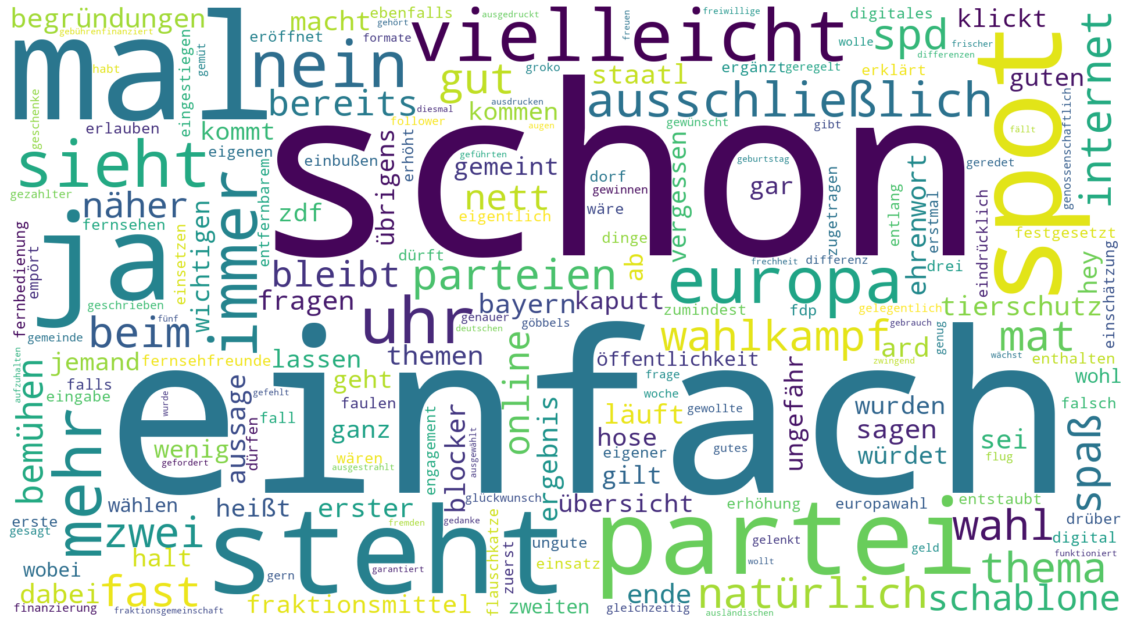

In [21]:
analyzer_DiePARTEI.wordcloud()

In [22]:
analyzer_DiePARTEI.bagofwords(extended_view=False).head(20)

,words,count,index,index_perc
0,schon,9,1,0.187970
1,einfach,8,2,0.375940
2,mal,8,3,0.563910
3,ja,5,4,0.751880
4,steht,5,5,0.939850
5,spot,5,6,1.127820
6,partei,5,7,1.315789
7,vielleicht,5,8,1.503759
8,sieht,4,9,1.691729
9,nein,4,10,1.879699


## Who tweets the most?

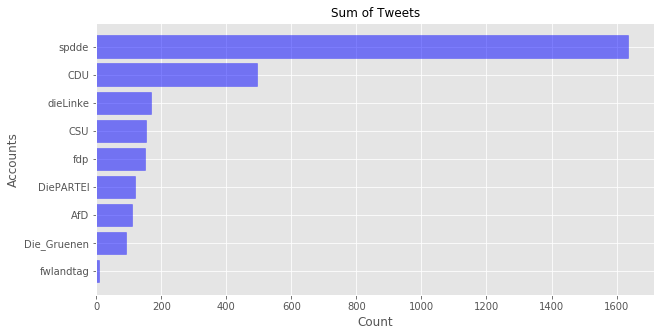

In [23]:
analyzer_load.plot_bar_sum(type='count', facecolor='blue', edgecolor='blue', alpha=0.5)

#### CDU has itchy fingers

## Who gets the most likes?

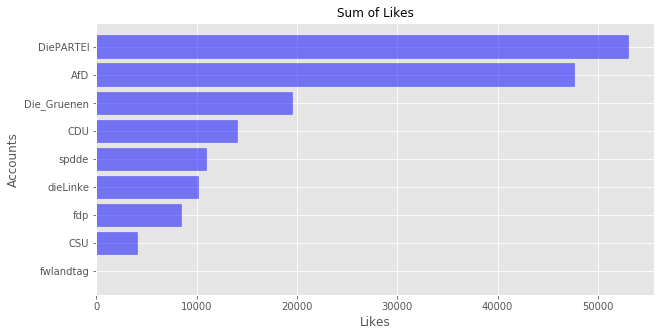

In [24]:
analyzer_load.plot_bar_sum(type='likes', facecolor='blue', edgecolor='blue', alpha=0.5)

#### Citation: "Die PARTEI – sie ist sehr gut!" ~Die PARTEI

## Who gets shared the most?

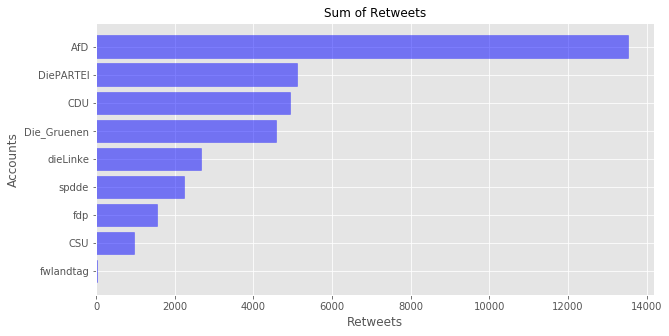

In [25]:
analyzer_load.plot_bar_sum(type='retweets', facecolor='blue', edgecolor='blue', alpha=0.5)

#### Surpprise AfD! - did someone say bots?

In [26]:
analyzer_dieLinke.df
#bagofwords(extended_view=False)

,tweets,len,author,date,likes,retweets,hashtags,linked_accounts,urls,id,tweet_type
1985,"""Ich komm aus einer politischen Familie. Und i...",302,dieLinke,2019-05-22 16:42:26,132,34,"Europawahl2019, europasolidarisch, EP2019",OezlemADemirel,,1131238903770484739,tweet
1986,"#Amazon und Co. müssen gezwungen zwingen, sich...",293,dieLinke,2019-05-22 14:56:31,59,17,"Amazon, Mindeststeuern, Managergehälter, Leiha...",,,1131212248255479821,tweet
1987,Bei vielen Menschen fällt die Wahlentscheidung...,304,dieLinke,2019-05-22 14:15:33,43,22,"Europa, Europawahl, europasolidarisch, ep2019",,https://t.co/l50VTRCjuu,1131201939495161858,tweet
1988,Den Avancen des sozialdemokratischen Spitzenka...,279,dieLinke,2019-05-21 15:28:12,24,9,"Europawahl2019, EU, europasolidarisch","TimmermansEU, schirdewan",https://t.co/jPzrX4FJNq,1130857835590324224,tweet
1989,"#Strache wird beim Versuch, sich kaufen zu las...",278,dieLinke,2019-05-21 13:45:01,364,85,"Strache, Schäuble, CDU",katjakipping,https://t.co/cVrVhIfhcF,1130831866800594944,tweet
1990,"#Europa wird ein besserer Ort sein, wenn wir d...",286,dieLinke,2019-05-20 20:33:36,67,15,"Europa, Gipfeltreffen, europasolidarisch, euro...",b_riexinger,,1130572302972870656,tweet
1991,"Wir wollen, dass niemand gezwungen wird, zu fl...",277,dieLinke,2019-05-20 20:26:31,109,28,"Gipfeltreffen, europasolidarisch, europawahl20...",b_riexinger,,1130570520511090688,tweet
1992,Es muss beim Klimaschutz dringend gehandelt we...,261,dieLinke,2019-05-20 20:20:09,52,13,"Gipfeltreffen, europasolidarisch, europawahl20...",b_riexinger,,1130568918840545281,tweet
1993,"Europa wird keine Zukunft haben, wenn 30 Proze...",208,dieLinke,2019-05-20 19:49:50,52,14,"Gipfeltreffen, europasolidarisch, europawahl20...",b_riexinger,,1130561288524980226,tweet
1994,"Ja, wir brauchen dringend gesetzliche Mindestl...",191,dieLinke,2019-05-20 19:41:45,90,22,"Gipfeltreffen, europasolidarisch, europawahl20...",b_riexinger,,1130559253482299392,tweet


In [27]:
analyzer_load.tweet_filter_account(accountname = ["spdde"]).bagofwords(extended_view=False)

,words,count,index,index_perc
0,hi,418,1,0.024096
1,europa,122,2,0.048193
2,mehr,118,3,0.072289
3,ja,100,4,0.096386
4,mal,96,5,0.120482
5,mindestlohn,96,6,0.144578
6,spd,94,7,0.168675
7,menschen,77,8,0.192771
8,wer,75,9,0.216867
9,rückkehrrecht,74,10,0.240964


In [28]:
analyzer_load.df

,tweets,len,author,date,likes,retweets,hashtags,linked_accounts,urls,id,tweet_type
0,"@wiedernichtgan1 @katarinabarley @zdf Hi, wied...",259,spdde,2019-05-22 22:22:18,0,0,,"wiedernichtgan1, katarinabarley, ZDF",https://t.co/EU0RIHkISH,1131324433459810305,tweet
1,@paulwal97169800 @katarinabarley @zdf @gazprom...,146,spdde,2019-05-22 22:19:10,0,0,,"PaulWal97169800, katarinabarley, ZDF, GazpromDE",https://t.co/PbmUhKi60D,1131323643613634561,tweet
2,"@kala246 @katarinabarley Hi, Ka!\r\nVielleicht...",121,spdde,2019-05-22 22:17:04,0,0,,"KaLa246, katarinabarley",https://t.co/1Vsloa5gPD,1131323114686746624,tweet
3,"@akitzi @katarinabarley @zdf Hi, a.kitzberger_...",188,spdde,2019-05-22 22:16:09,0,0,,"AKitzi, katarinabarley, ZDF",https://t.co/1Vsloa5gPD,1131322885300207616,tweet
4,"@coernli @katarinabarley @zdf Hi, Mike!\r\nhtt...",66,spdde,2019-05-22 22:14:41,0,0,,"Coernli, katarinabarley, ZDF",https://t.co/M2FPBbeL3y,1131322514498621441,tweet
5,"@berndfachinsson @katarinabarley @zdf Hi, Fach...",164,spdde,2019-05-22 22:12:11,0,0,,"berndfachinsson, katarinabarley, ZDF",,1131321885508218880,tweet
6,"@nele90 @nnfr19 @katarinabarley @zdf Hi, Elena...",192,spdde,2019-05-22 22:09:46,0,0,,"Nele90, katarinabarley, ZDF",https://t.co/vWUye89hpb,1131321277304721409,tweet
7,@tobias_ppunkt @spdbt Wir können nur dann unse...,133,spdde,2019-05-22 20:34:19,0,0,,"tobias_ppunkt, spdbt",,1131297257322668043,tweet
8,@the_thirt_man @larsklingbeil @cdu @akk Wir wo...,160,spdde,2019-05-22 20:32:46,0,0,,"The_Thirt_Man, larsklingbeil, CDU, akk",https://t.co/q3SOnkR7OF,1131296866879066113,tweet
9,@_loumias_ @osmanirc89 @tagesschau @hubertus_h...,250,spdde,2019-05-22 20:25:20,0,0,,"_Loumias_, OsmaniRC89, tagesschau, hubertus_heil",https://t.co/izfGgcOSkp,1131294995410018306,tweet


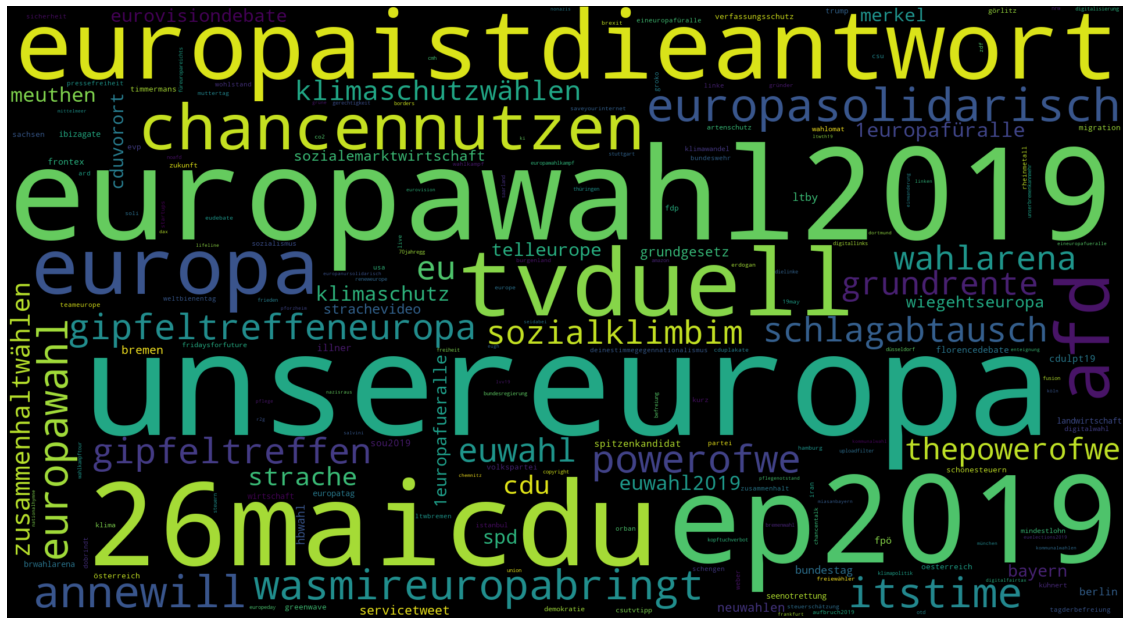

In [12]:
analyzer_load.wordcloud(type='hashtags',color="black")

In [8]:
haka = analyzer_load.tweet_filter_hashtags(["thepowerofwe"],
    all_in_one=False,
    reset_drop_index=False,
    inplace=False,
).df
haka

,tweets,author,date,likes,retweets,hashtags,linked_accounts,urls,id,tweet_type
3436,RT @JuliaKloeckner: Überzeugender Auftritt von...,CDU,2019-05-16 19:57:13,77,13,"tvduell, thepowerofwe, Europawahl2019, UnserEu...","JuliaKloeckner, ManfredWeber, ZDF",,1129113593503506432,retweet
3439,"Wir leben im besten #Europa, das wir jemals ha...",CDU,2019-05-16 19:52:09,78,25,"Europa, unserEuropa, unserEuropa, 26MaiCDU, th...","ManfredWeber, EPP",,1129112320913924099,tweet
3445,Ich werde einen parteiunabhängigen Rechtsstaat...,CDU,2019-05-16 19:37:38,50,15,"unserEuropa, 26MaiCDU, thepowerofwe, TVDuell","ManfredWeber, EPP",,1129108664441294850,tweet
3446,"Nur wenn wir die Probleme der Menschen lösen, ...",CDU,2019-05-16 19:34:38,67,11,"unserEuropa, 26MaiCDU, thepowerofwe, TVDuell, ...","ManfredWeber, EPP",,1129107909479157760,tweet
3448,Am 26. Mai geht es um verdammt viel. Ich will ...,CDU,2019-05-16 19:31:18,77,28,"Europa, Brexit, unserEuropa, 26MaiCDU, thepowe...","ManfredWeber, EPP",,1129107072828813314,tweet
3463,"Engagierter Grenzschutz und Menschen helfen, d...",CDU,2019-05-16 19:09:25,25,7,"unserEuropa, 26MaiCDU, thepowerofwe, TVDuell, ...","ManfredWeber, EPP",,1129101565338558465,tweet
3467,"Der Staat entscheidet, wer reinkommt und nicht...",CDU,2019-05-16 19:06:10,63,12,"unserEuropa, 26MaiCDU, thepowerofwe, TVDuell, ...","ManfredWeber, EPP",,1129100747692564481,tweet
3469,"Engagierter Grenzschutz und Menschen helfen, d...",CDU,2019-05-16 19:04:33,20,9,"Migration, unserEuropa, 26MaiCDU, thepowerofwe...","ManfredWeber, EPP",,1129100341608427520,tweet
3476,"Wir wollen #Copyright schützen, aber keiner wi...",CDU,2019-05-16 18:57:16,30,10,"Copyright, Urheberrechtsreform, unserEuropa, 2...",CDU,https://t.co/WqCFfeXKNc,1129098506554286080,tweet
3484,Wir müssen bei der Steuergerechtigkeit mehr Dr...,CDU,2019-05-16 18:53:18,27,8,"Europa, unserEuropa, 26MaiCDU, thepowerofwe, T...","ManfredWeber, EPP",,1129097510755217408,tweet


,tweets,author,date,likes,retweets,hashtags,linked_accounts,urls,id,tweet_type
1410,@mailmerman @katarinabarley \r\nJeder kann ein...,spdde,2019-05-19 20:56:21,4,0,"strache, annewill, europaistdieantwort","Mailmerman, katarinabarley",,1130215639266877441,tweet
1411,@mofai93 @katarinabarley Oh YES #europaistdiea...,spdde,2019-05-19 20:55:13,3,1,"europaistdieantwort, annewill, Europawahl2019,...","mofai93, katarinabarley",,1130215354284818432,tweet
1445,@dersandzak @klarfred wir mögen die auch nicht...,spdde,2019-05-19 20:35:01,3,0,"europaistdieantwort, annewill, Europawahl2019,...",klarfred,,1130210269358170113,tweet
1455,".@katarinabarley zur Frage, ob sich Konservati...",spdde,2019-05-19 20:31:11,179,32,annewill,"katarinabarley, ManfredWeber",,1130209305842671617,tweet
1460,@WonkaRaphael #europaistdieantwort #annewill #...,spdde,2019-05-19 20:29:05,3,0,"europaistdieantwort, annewill, Europawahl2019,...",WonkaRaphael,,1130208777540702209,tweet
1463,@tweetbote @Regierungs4tel #europaistdieantwor...,spdde,2019-05-19 20:28:17,1,0,"europaistdieantwort, annewill, Europawahl2019,...","tweetbote, Regierungs4tel",,1130208578365796353,tweet
1471,@WonkaRaphael @EricksonTarik @Dylan_1941 #euro...,spdde,2019-05-19 20:20:56,1,0,"europaistdieantwort, annewill, Europawahl2019,...","WonkaRaphael, EricksonTarik, Dylan_1941",,1130206725049593860,tweet
1474,RT @Meyermit_ey: Weber redet aufgeregt auf Kat...,spdde,2019-05-19 20:20:27,77,6,"TeamBarley, annewill",Meyermit_ey,,1130206605767786496,retweet
1476,@dersandzak @ZDFWATCH @lzserioes @Meyermit_ey ...,spdde,2019-05-19 20:19:15,7,0,"europaistdieantwort, annewill, Europawahl2019,...","ZDFWATCH, lzserioes, Meyermit_ey",,1130206302863597569,tweet
1478,@mofai93 @Joerg_Meuthen @katarinabarley und wi...,spdde,2019-05-19 20:17:44,6,0,"europaistdieantwort, annewill, Europawahl2019,...","mofai93, Joerg_Meuthen, katarinabarley",,1130205921651699712,tweet


In [30]:
analyzer_load.df.hashtags.str.contains('EuropaistdieAntwort',case=False)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2899    False
2900    False
2901    False
2902    False
2903    False
2904    False
2905    False
2906    False
2907    False
2908    False
2909    False
2910    False
2911    False
2912    False
2913    False
2914    False
2915    False
2916    False
2917    False
2918    False
2919    False
2920    False
2921    False
2922    False
2923    False
2924    False
2925    False
2926    False
2927    False
2928    False
Name: hashtags, Length: 2929, dtype: bool

In [2]:
haka = analyzer_load.tweet_filter_hashtags(["tvduel","schlagabtausch"],
    all_in_one=True,
    reset_drop_index=False,
    inplace=False,
)

KeyError: 'hashtags'

""


In [45]:
for i in haka.tweets:
    print(i)

TypeError: 'NoneType' object is not iterable

In [33]:
for i in analyzer_load.df.hashtags:
    print (i)
































servicetweet




















schönesteuern


















































Europa, EuropaistdieAntwort, Europawahl2019


Artikel13




Sozenliebe




EuropaistdieAntwort




Grundgesetz, Gleichberechtigung, EuropaistdieAntwort





EuropaistdieAntwort, schöneSteuern
schöneSteuern, Europa, EuropaistdieAntwort






EuropaistdieAntwort


















Sozialklimbim, Grundrente





schöneSteuern
schöneSteuern
Europa, schöneSteuern, EuropaistdieAntwort



Sozialklimbim
Grundrente











Grundrente




servicetweet






























EuropaWahl, Europaistdieantwort, Europa

EuropaWahl, Europa, Europe












EuropaWahl























100Metermit, EuropaistdieAntwort




















































Sozialklimbim, Grundrente




Sozialklimbim


Grundrente

















Grundrente




















































Europa, wasmireuropabringt, EuropaistdieAntwort

europaistd

spdde


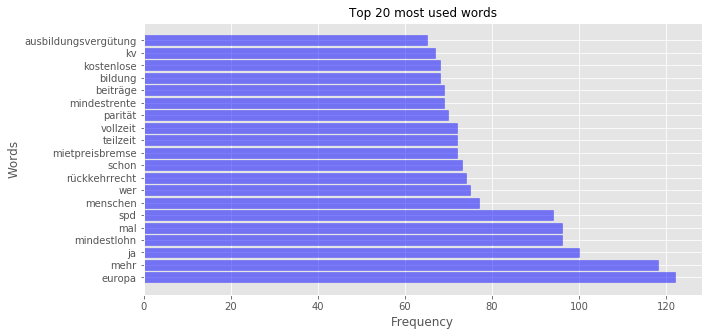

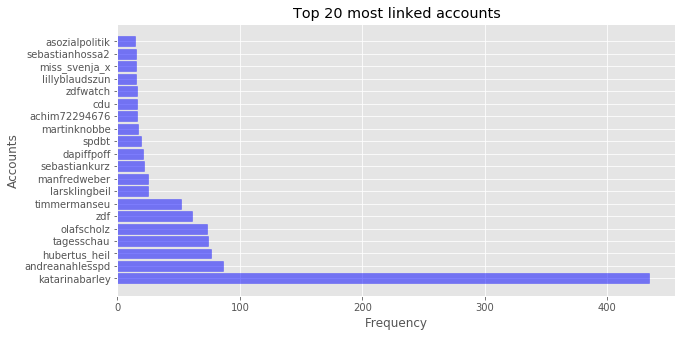

fdp


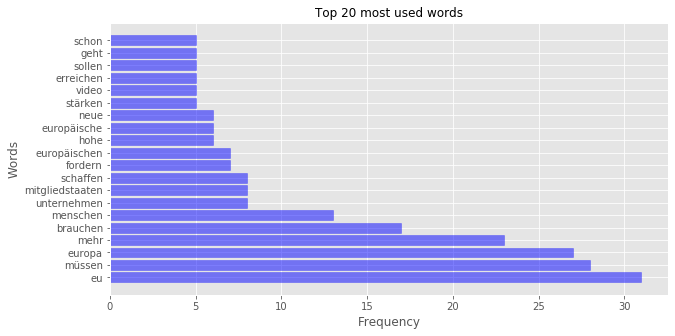

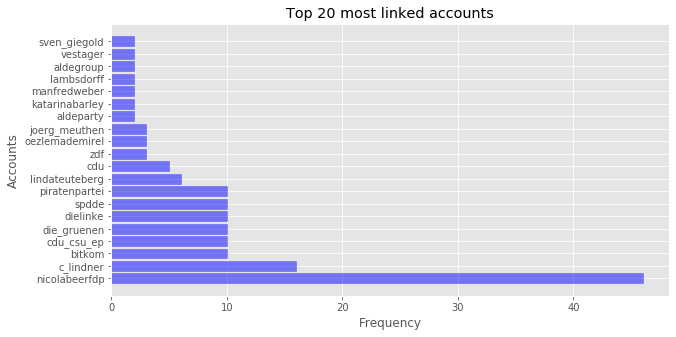

Die_Gruenen


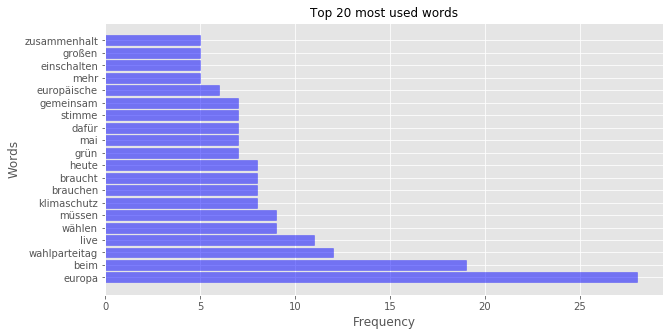

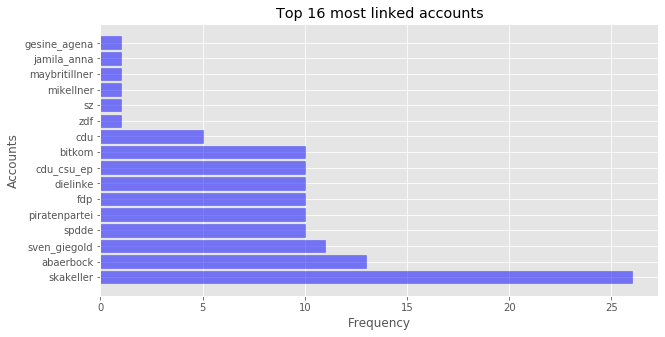

AfD


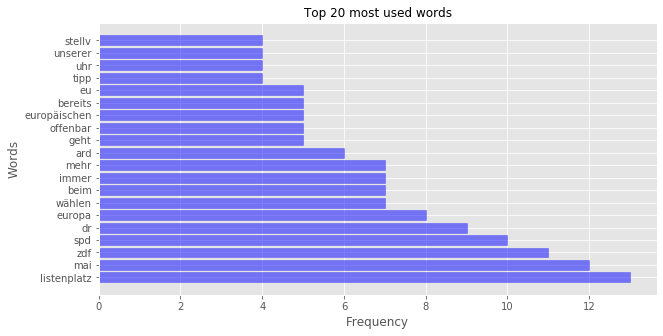

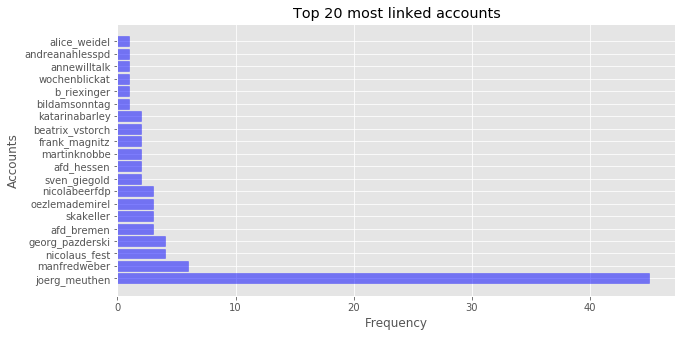

dieLinke


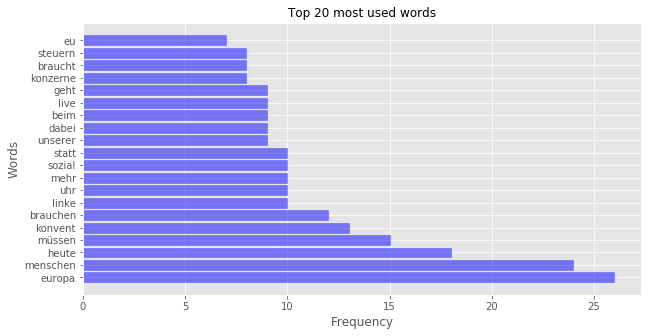

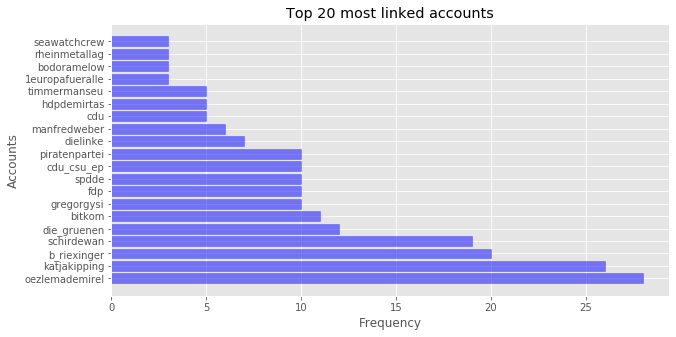

fwlandtag


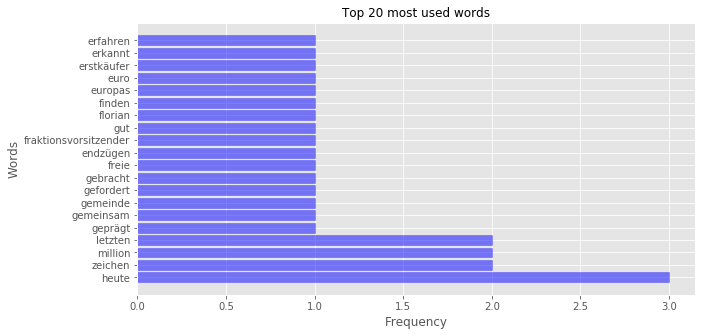

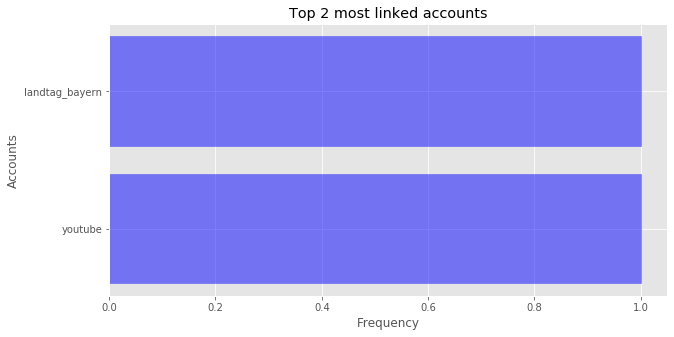

DiePARTEI


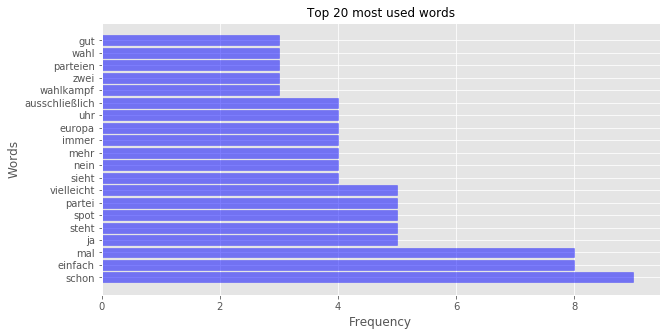

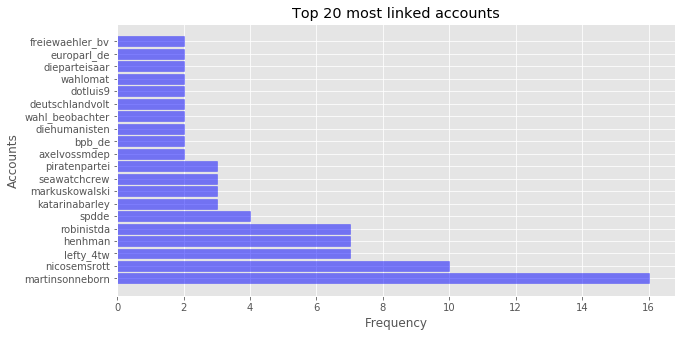

CDU


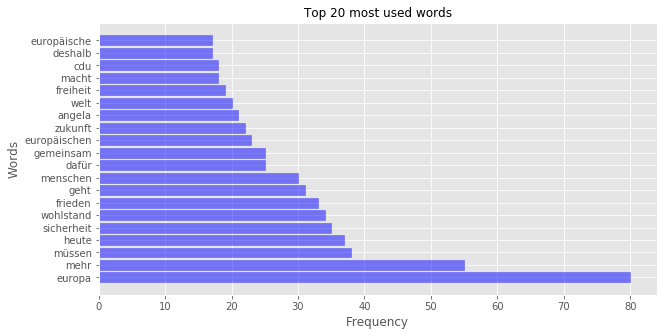

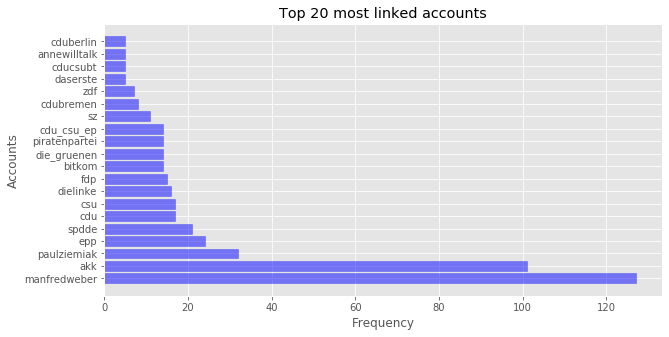

CSU


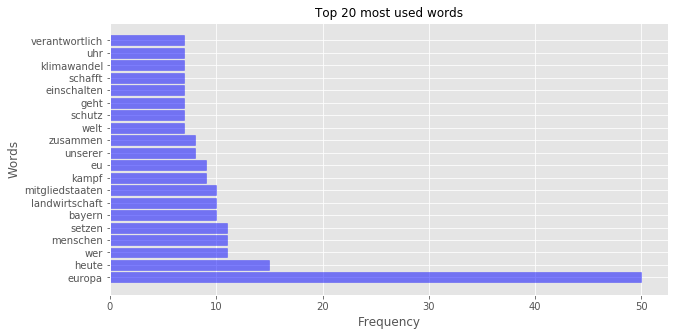

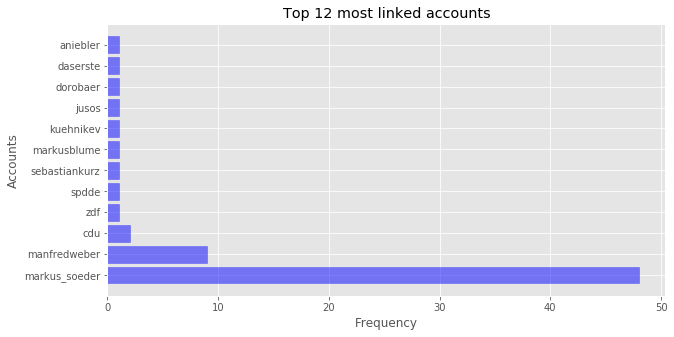

In [34]:
for i in analyzer_load.df.author.unique():
    print(i)
    analyzer_load.tweet_filter_account(accountname = [i])
    analyzer_load.tweet_filter_account(accountname = [i]).plot_bar(type="wct", count=20, stopOWN = ["rt","hi"])
    analyzer_load.tweet_filter_account(accountname = [i]).plot_bar(type="la_ct", count=20)

In [35]:
#This is the last cell, notebook should run through without Problems and then start the presentation.

#!jupyter nbconvert Playground_Lukas.ipynb --to slides --post serve --SlidesExporter.reveal_theme=serif --SlidesExporter.reveal_scroll=True 
#--SlidesExporter.reveal_transition=none

In [36]:
yat.TweetAnalyzer(df = df).bagofwords(extended_view=False)


,words,count,index,index_perc
0,rt,1465,1,0.009896
1,europa,520,2,0.019792
2,hi,418,3,0.029688
3,mehr,279,4,0.039584
4,menschen,230,5,0.049480
5,heute,205,6,0.059377
6,müssen,196,7,0.069273
7,eu,184,8,0.079169
8,geht,182,9,0.089065
9,wer,157,10,0.098961


In [37]:
df_AfD.tweets[1874]

"++ Bußgeld wegen verweigerten #Moschee-Besuchs: Jetzt geht's vors #Bundesverfassungsgericht! ++ \r\nWider die religiöse Indoktrination! Die Eltern aus #Rendsburg ziehen jetzt vors höchste deutsche Gericht! Mit Hilfe der @AfD_Hessen!\r\n#EUWahl #Europawahl2019\r\n➡️ https://t.co/sbD1HtPKeg https://t.co/uMDe5Ky4PW"

In [15]:
df_AfD

,tweets,author,date,likes,retweets,hashtags,linked_accounts,urls,id,tweet_type
2359,++ Bußgeld wegen verweigerten #Moschee-Besuchs...,AfD,2019-05-22 15:09:38,738,233,"Moschee, Bundesverfassungsgericht, Rendsburg, ...",AfD_Hessen,https://t.co/sbD1HtPKeg,1131215549764186117,tweet
2360,RT @WMuhsal: Gleich geht’s los zum Wahlkampfab...,AfD,2019-05-22 15:01:45,717,135,,"WMuhsal, Joerg_Meuthen",,1131213564159627264,retweet
2361,RT @AfD_FraktionNRW: #SPD im #LtNRW instrument...,AfD,2019-05-22 14:50:48,187,49,"SPD, LtNRW",AfD_FraktionNRW,,1131210809907064832,retweet
2362,++ Wir feiern 5⃣0⃣.0⃣0⃣0⃣Instagram-Abonnenten!...,AfD,2019-05-22 14:50:26,208,30,"AfD, Europawahl2019",,https://t.co/g9f4EKkIjr,1131210715275116545,tweet
2363,RT @Alice_Weidel: Die Pressefreiheit wurde auf...,AfD,2019-05-22 13:24:20,1441,511,,Alice_Weidel,,1131189048784162819,retweet
2364,Irre: Kurz vor der #EUWahl setzt man den überw...,AfD,2019-05-22 13:23:44,522,167,"EUWahl, EU, AfD, Europawahl2019",Nicolaus_Fest,https://t.co/Z96tz6lUkb,1131188897571057665,tweet
2365,❗️🎥#AfD-Endspurt LIVE erleben❗️\r\nVerfolgen S...,AfD,2019-05-22 12:28:11,253,76,"AfD, EUWahl, Gera, Görlitz, Frankfurt, Europaw...",,"https://t.co/M4WNyLvNs3, https://t.co/fag1R1JL...",1131174917230223366,tweet
2366,Wir veröffentlichen heute die Absage-Mail der ...,AfD,2019-05-22 11:23:12,697,390,"Linksextremismus, Europawahl2019, EP2019, AfD",,"https://t.co/jJm3hz7ZNP, https://t.co/WJ4J0gWcEl",1131158564817592326,tweet
2367,RT @Georg_Pazderski: ++ #EUWahl am Sonntag wir...,AfD,2019-05-22 10:07:47,385,90,"EUWahl, Brexit",Georg_Pazderski,,1131139585088659456,retweet
2368,RT @WMuhsal: Heute Abend kommt unser Bundesspr...,AfD,2019-05-22 10:05:38,452,94,EU,"WMuhsal, Joerg_Meuthen",,1131139043859869697,retweet


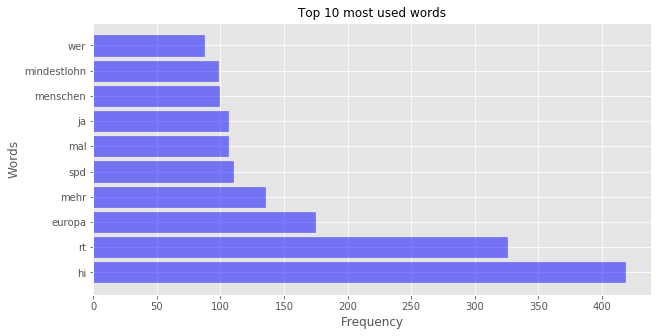

In [16]:
analyzer_SPDEuropa.plot_bar(type="wct")